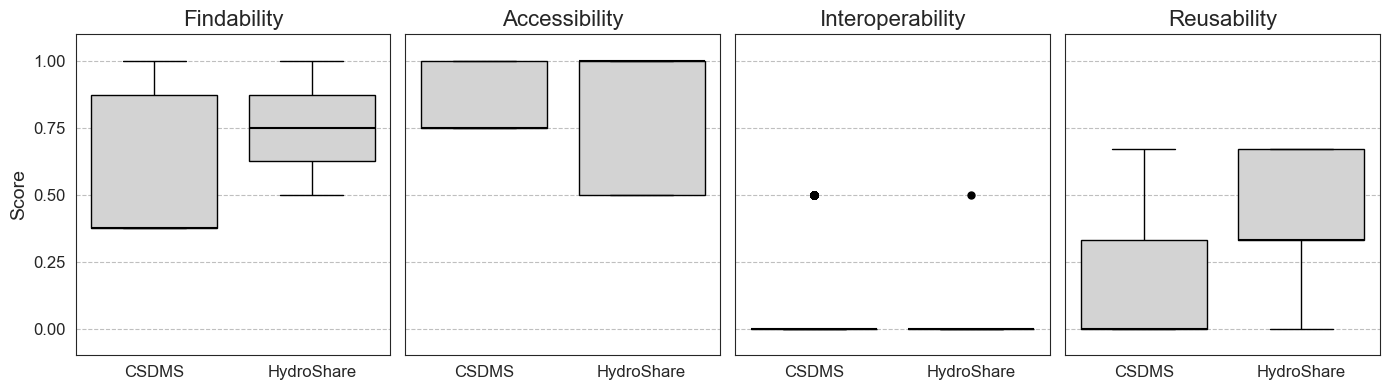

In [1]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURATION ---

# Define your two input directories and the labels you want in the plot legend.
# Ensure the names inside the quotes match your directory names exactly.
INPUT_CONFIG = {
    "CSDMS": Path("out"), # Example directory 1
    "HydroShare": Path("out_hydroshare"), # Example directory 2
}

# Define the FAIR principles you want to plot
PRINCIPLES_TO_PLOT = ["F", "A", "I", "R"]

# Define fonts
font_title = 16
font_label = 14
font_ticks = 12


def collect_fair_scores(input_dir: Path, source_label: str) -> list:
    """Collects FAIR scores from JSON files in a specified directory."""
    records = []
    
    # Ensure the directory exists to avoid errors on the glob call
    if not input_dir.is_dir():
        print(f"Warning: Directory not found: {input_dir}. Skipping.")
        return records

    for file in input_dir.glob("*.json"):
        try:
            with open(file, 'r') as f:
                data = json.load(f)
                if not isinstance(data, dict) or not data:
                    continue
                
                # Assuming the model name is the only/first key
                model_name = list(data.keys())[0]
                scores = data[model_name].get("scores", {})

                if not scores:
                    continue
                
                # Append a record with the source label and the main FAIR scores
                records.append({
                    "Source": source_label,
                    "Model": model_name,
                    "F": scores.get("F"),
                    "A": scores.get("A"),
                    "I": scores.get("I"),
                    "R": scores.get("R")
                    # You can include sub-scores (F1, A1, etc.) here if needed
                })
        except Exception as e:
            print(f"Error reading {file.name}: {e}")

    return records


# --- DATA LOADING AND PREPARATION ---

all_records = []
for label, directory in INPUT_CONFIG.items():
    all_records.extend(collect_fair_scores(directory, label))

# Guard against empty data
if not all_records:
    raise ValueError("No valid FAIR score records were found in any of the directories.")

# Convert to DataFrame
df_combined = pd.DataFrame(all_records)

# Reshape DataFrame to long format for seaborn plotting
df_melted = df_combined.melt(
    id_vars=["Source", "Model"], 
    value_vars=PRINCIPLES_TO_PLOT,
    var_name="FAIR_Principle", 
    value_name="Score"
)

# --- PLOTTING ---

# Set seaborn style for a clean publication look without a grid
sns.set_style("white")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4), sharey=True)

# axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

# Define the labels for the plot titles
principle_names = {
    "F": "Findability",
    "A": "Accessibility",
    "I": "Interoperability",
    "R": "Reusability"
}

sns.set_style("white")

for i, principle in enumerate(PRINCIPLES_TO_PLOT):
    ax = axes[i]
    
    # Filter data for the current principle
    df_principle = df_melted[df_melted["FAIR_Principle"] == principle]

    # Generate the box plot with black/gray aesthetics
    sns.boxplot(
        x="Source",
        y="Score",
        data=df_principle,
        ax=ax,
        color='lightgray',  # Fill box with gray
        boxprops={'edgecolor': 'black'},  # Black box outline
        medianprops={'color': 'black', 'linewidth': 1.5},  # Black median line
        whiskerprops={'color': 'black'},  # Black whiskers
        capprops={'color': 'black'},  # Black caps
        # Outliers (Fliers) are set to be solid black circles
        flierprops={'markerfacecolor': 'black', 'markeredgecolor': 'black', 'marker': 'o', 'markersize': 5}
    )

    # Set title and labels
    ax.set_title(principle_names[principle], fontsize=font_title)
    ax.set_xlabel("", fontsize=font_label) # X-label not needed, "Source" is clear

    if i == 0:
        ax.set_ylabel("Score", fontsize=font_label)
        ax.set_yticks([0,0.25,0.5,0.75,1])
        ax.tick_params(axis='y', labelsize=font_ticks)
        
    # Only label the y-axis for the plots on the left column (i=0, i=2)
    # if i % 2 == 0:
    #     ax.set_ylabel("Score", fontsize=font_label)
    else:
        ax.set_ylabel("")
        
    ax.set_ylim(0, 1) # Ensure consistent y-axis scale

    # Set tick label sizes
    ax.tick_params(axis='x', labelsize=font_ticks)
    # ax.tick_params(axis='y', labelsize=font_ticks)

    # ax.set_ylim([-0.1,1.1])

    # ax.set_yticks([0,0.25,0.5,0.75,1])
    # # Add a subtle horizontal grid for better score reading, even without 'whitegrid' style
    ax.grid(axis="y", linestyle="--", alpha=0.5, color='gray')

plt.ylim([-0.1,1.1])
# fig.suptitle("Comparison of FAIR Scores by Principle", fontsize=20, y=1.02)
plt.tight_layout()
plt.savefig("FAIR_score_summary.png")
plt.show()

C:\Users\AbnerBogan\AppData\Local\Temp\ipykernel_48696\1532582507.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\AbnerBogan\AppData\Local\Temp\ipykernel_48696\1532582507.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\AbnerBogan\AppData\Local\Temp\ipykernel_48696\1532582507.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\AbnerBogan\AppData\Local\Temp\ipykernel_48696\1532582507.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

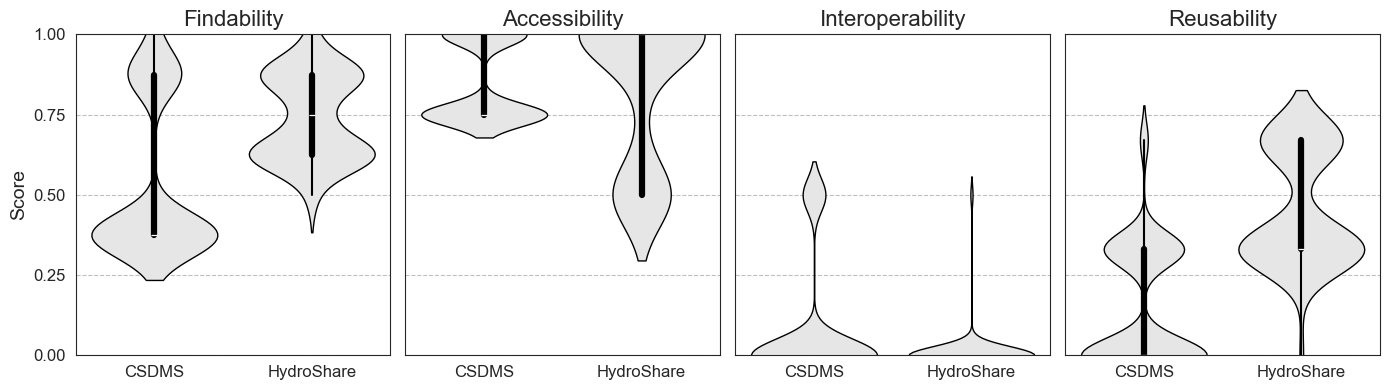

In [2]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURATION ---

# Define your two input directories and the labels you want in the plot legend.
# Ensure the names inside the quotes match your directory names exactly.
INPUT_CONFIG = {
    "CSDMS": Path("out"), # Example directory 1
    "HydroShare": Path("out_hydroshare"), # Example directory 2
}

# Define the FAIR principles you want to plot
PRINCIPLES_TO_PLOT = ["F", "A", "I", "R"]

# Define fonts
font_title = 16
font_label = 14
font_ticks = 12


def collect_fair_scores(input_dir: Path, source_label: str) -> list:
    """Collects FAIR scores from JSON files in a specified directory."""
    records = []
    
    # Ensure the directory exists to avoid errors on the glob call
    if not input_dir.is_dir():
        print(f"Warning: Directory not found: {input_dir}. Skipping.")
        return records

    for file in input_dir.glob("*.json"):
        try:
            with open(file, 'r') as f:
                data = json.load(f)
                if not isinstance(data, dict) or not data:
                    continue
                
                # Assuming the model name is the only/first key
                # Safely get the first key if data is not empty
                model_name = next(iter(data), None) 
                if model_name is None:
                    continue
                    
                scores = data[model_name].get("scores", {})

                if not scores:
                    continue
                
                # Append a record with the source label and the main FAIR scores
                records.append({
                    "Source": source_label,
                    "Model": model_name,
                    "F": scores.get("F"),
                    "A": scores.get("A"),
                    "I": scores.get("I"),
                    "R": scores.get("R")
                    # You can include sub-scores (F1, A1, etc.) here if needed
                })
        except Exception as e:
            print(f"Error reading {file.name}: {e}")

    return records


# --- DATA LOADING AND PREPARATION ---

all_records = []
for label, directory in INPUT_CONFIG.items():
    all_records.extend(collect_fair_scores(directory, label))

# Guard against empty data
if not all_records:
    raise ValueError("No valid FAIR score records were found in any of the directories.")

# Convert to DataFrame
df_combined = pd.DataFrame(all_records)

# Reshape DataFrame to long format for seaborn plotting
df_melted = df_combined.melt(
    id_vars=["Source", "Model"], 
    value_vars=PRINCIPLES_TO_PLOT,
    var_name="FAIR_Principle", 
    value_name="Score"
)

# --- PLOTTING ---

# Set seaborn style for a clean publication look without a grid
sns.set_style("white")

# Create a 1x4 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4), sharey=True)

# Define the labels for the plot titles
principle_names = {
    "F": "Findability",
    "A": "Accessibility",
    "I": "Interoperability",
    "R": "Reusability"
}

# The colors argument for violin plots
# We use '0.8' for a light gray fill and '0.1' for a dark gray border/median line
# Note: For strict B&W, use 'white' for fill and 'black' for line attributes.
# The current selection uses a light gray fill for better visual separation.
PLOT_COLORS = ['0.9', '0.9'] # Light gray for the two 'Source' categories

for i, principle in enumerate(PRINCIPLES_TO_PLOT):
    ax = axes[i]
    
    # Filter data for the current principle
    df_principle = df_melted[df_melted["FAIR_Principle"] == principle]

    # VIOILIN PLOT REPLACEMENT
    # Use 'inner="box"' to include a miniature box plot (median, IQR) inside the violin
    # or 'inner="quartile"' for just quartiles, or 'inner=None' for just the distribution.
    # The 'palette' is set to use the same light gray for all violins.
    sns.violinplot(
        x="Source",
        y="Score",
        data=df_principle,
        ax=ax,
        palette=PLOT_COLORS,
        linewidth=1, # Black outline thickness
        edgecolor='black' # Black outline color
        # inner="box", # Show a small box plot inside the violin
        # cut=0 # Truncate the violins at the minimum and maximum data points
    )

    # Set title and labels
    ax.set_title(principle_names[principle], fontsize=font_title)
    ax.set_xlabel("", fontsize=font_label) # X-label not needed, "Source" is clear

    if i == 0:
        ax.set_ylabel("Score", fontsize=font_label)
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
        ax.tick_params(axis='y', labelsize=font_ticks)
    else:
        ax.set_ylabel("")
        
    ax.set_ylim(0, 1) # Ensure consistent y-axis scale

    # Set tick label sizes
    ax.tick_params(axis='x', labelsize=font_ticks)

    # Add a subtle horizontal grid for better score reading
    ax.grid(axis="y", linestyle="--", alpha=0.5, color='gray')

# The shared y-axis takes care of setting the limits for all plots
plt.ylim([0, 1])
plt.tight_layout()
plt.savefig("FAIR_score_summary_violin.png")
plt.show()

Saved: FAIR_Score_HydroShare.png


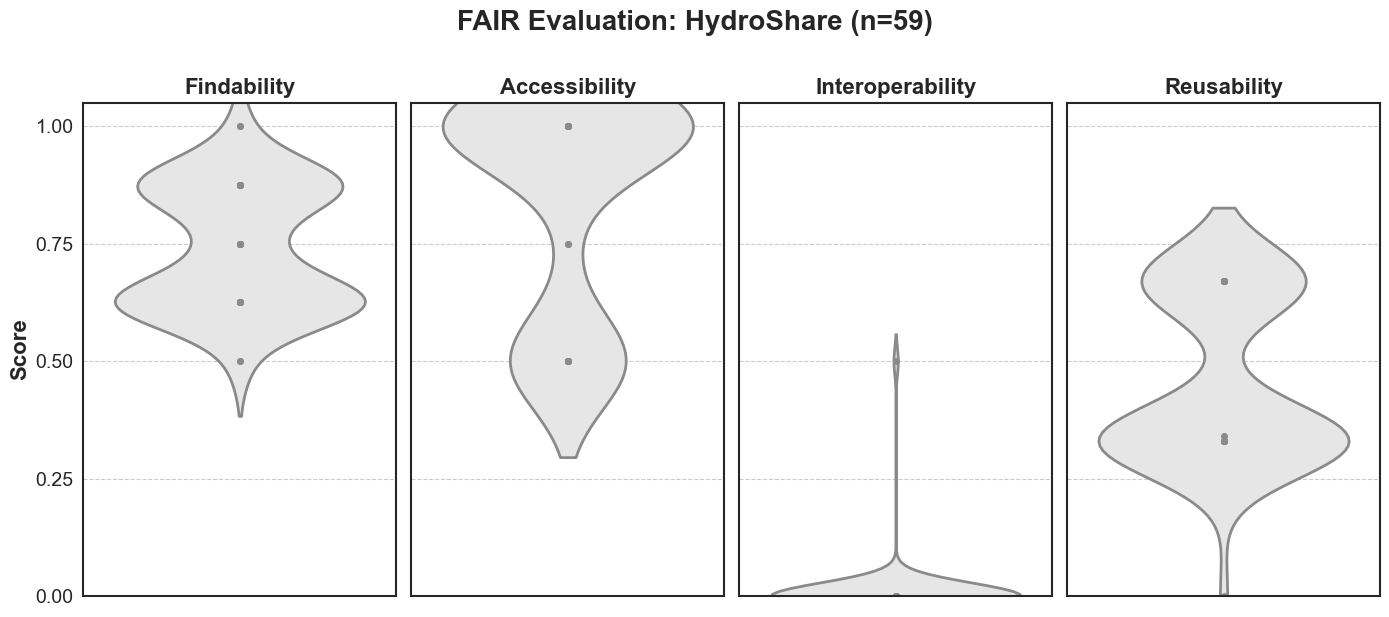

Saved: FAIR_Score_CSDMS.png


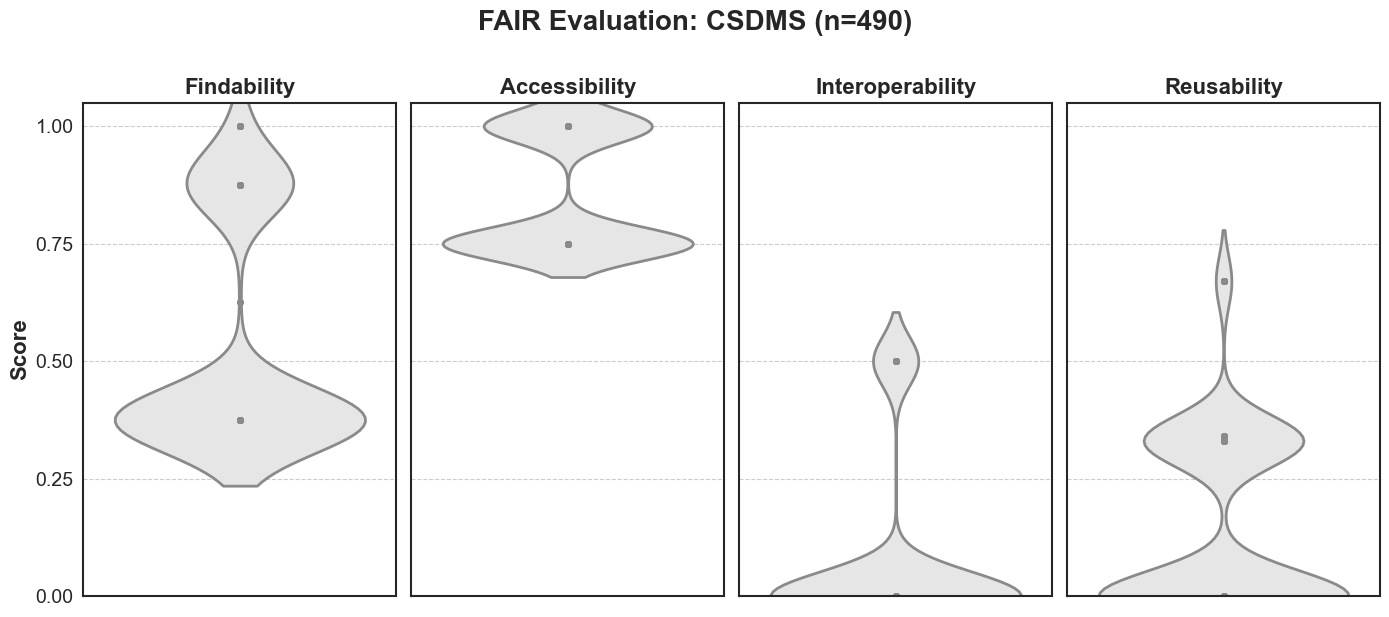

In [11]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURATION ---
INPUT_CONFIG = {
    "HydroShare": Path("out_hydroshare"),
    "CSDMS": Path("out"),
}

PRINCIPLES_TO_PLOT = ["F", "A", "I", "R"]
PRINCIPLE_NAMES = {
    "F": "Findability",
    "A": "Accessibility",
    "I": "Interoperability",
    "R": "Reusability"
}

# 1) INCREASED FONT SETTINGS
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.linewidth'] = 1.5
font_suptitle = 20  # Overall figure title
font_title = 16     # Individual subplot titles (F, A, I, R)
font_label = 16     # Axis labels (Score)
font_ticks = 14     # Tick numbers (0.25, 0.50, etc)

def collect_fair_scores(input_dir: Path, source_label: str) -> list:
    """Collects FAIR scores from JSON files."""
    records = []
    if not input_dir.is_dir():
        print(f"Warning: Directory not found: {input_dir}. Skipping.")
        return records

    for file in input_dir.glob("*.json"):
        try:
            with open(file, 'r') as f:
                data = json.load(f)
                if not isinstance(data, dict) or not data:
                    continue
                
                model_name = next(iter(data), None) 
                if model_name is None:
                    continue
                    
                scores = data[model_name].get("scores", {})
                if not scores:
                    continue
                
                records.append({
                    "Source": source_label,
                    "Model": model_name,
                    "F": scores.get("F"),
                    "A": scores.get("A"),
                    "I": scores.get("I"),
                    "R": scores.get("R")
                })
        except Exception as e:
            print(f"Error reading {file.name}: {e}")
    return records

# --- DATA LOADING ---
all_records = []
for label, directory in INPUT_CONFIG.items():
    all_records.extend(collect_fair_scores(directory, label))

if not all_records:
    raise ValueError("No valid FAIR score records found.")

df_combined = pd.DataFrame(all_records)

# --- PLOTTING ---
sns.set_style("white")

# 2) SHOW AND SAVE SEPARATE PLOTS
sources = ["HydroShare", "CSDMS"]

for source in sources:
    # Filter data for the specific repository
    df_source = df_combined[df_combined["Source"] == source]
    
    # 3) ADD NUMBER OF FILES (n=XXX)
    n_count = len(df_source)
    
    # Create a new figure for each source
    fig, axes = plt.subplots(1, 4, figsize=(14, 6), sharey=True)
    fig.suptitle(f'FAIR Evaluation: {source} (n={n_count})', 
                 fontsize=font_suptitle, fontweight='bold', y=1.02)
    
    for i, principle in enumerate(PRINCIPLES_TO_PLOT):
        ax = axes[i]
        
        # Plotting
        sns.violinplot(
            y=df_source[principle],
            ax=ax,
            color='0.9',       # Light gray fill
            linewidth=2.0,     # Thicker lines
            inner="point"   # Shows median and quartiles
        )
        
        # Formatting
        ax.set_title(PRINCIPLE_NAMES[principle], fontsize=font_title, fontweight='bold')
        ax.set_ylim(0, 1.05)
        ax.set_xlabel("")
        ax.set_xticks([]) 
        
        # Only show Y-axis label on the far left
        if i == 0:
            ax.set_ylabel("Score", fontsize=font_label, fontweight='bold')
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
            ax.tick_params(axis='y', labelsize=font_ticks)
        else:
            ax.set_ylabel("")
            
        # Add subtle grid
        ax.grid(axis="y", linestyle="--", alpha=0.4, color='gray')

    # Final adjustments and saving each plot individually
    plt.tight_layout()
    save_filename = f"FAIR_Score_{source}.png"
    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {save_filename}")
    plt.show()